---
## Regression Tree Classifier Model

In this model the data set named 'dm.csv' is used to create a regression tree classifier model by using the DecisionTreeRegressor() object. It comes under the tree module of sklearn.

#### Objectives of this project

* Importing Required Packages
* Reading the Data set
* Data Sanity Checks
* Data Cleaning, feature engineering
* Data set splitting
* Define, train and Predict future values from model
* Check model performance using metrics
* Tabulate the results in a data frame
* Get the tree graph for this problem
---

---
### Importing Required Packages and Libraries and Mounting Google drive in Google Colab Environment
---

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
### Reading the 'dm.csv' data set from google drive and conducting data exploration tasks -
* Checking first few records
* Column names
* Data frame shape
* Mising Values
* Column Types
---

In [2]:
# Reading the Data frame
data = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/dm.csv')

In [3]:
# Checkiing First few records
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [8]:
# Checking Column Names
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [9]:
# Checking Data Frame Shape
print('Number of Samples is:', data.shape[0])
print('Number of Features is:', data.shape[1])

Number of Samples is: 1000
Number of Features is: 11


In [10]:
# Checking For Missing Values
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [11]:
# Checking for Column Types
data.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
Cust_Id         int64
dtype: object

---
### Handling the Missing Values

By observing the above codes, it is clear that the 'Hostory' column caontains 303 missing values. I want to replace them by either 'High' or 'Low' randomly. I used the fillna() function for this

---

In [12]:
# Fill the Missing values with 'High' and 'Low' having equal distribution
data['History'] = data['History'].fillna(pd.Series(['High', 'Low']).sample(n=len(data),
                                                              replace=True, weights=[0.5, 0.5]).reset_index(drop=True))

# Check whether the Codes runs properly or not
data['History'].isnull().sum()

0

---
### Feature Enginnering

It is the process of making the data set more perfect to build the model. It includes the following -
* Droping columns that are not needed
* Deal with Categorical Variables.
* Changing the Data Type to Float.
* Feature Subset selection for dependent and Independent Variables
---

In [13]:
data = data.drop(columns = 'Cust_Id', axis = 1)
# Checking whether the Above code line works or not
print('Number of Features is:', data.shape[1])

Number of Features is: 10


In [15]:
# Handling Categorical Columns and OneHot Encoding them
cat_cols = ['Age','Gender','OwnHome','Married','Location','History']
data_processed = pd.get_dummies(data = data , columns = cat_cols)

# Checking Whether the Above Code works or not
data_processed.shape[1] # Number of Features Increases

18

In [16]:
# Converting the Data Type to Float Object
data_processed = data_processed.astype(float)

# Checking whether the Above Code works or not
data_processed.dtypes

Salary             float64
Children           float64
Catalogs           float64
AmountSpent        float64
Age_Middle         float64
Age_Old            float64
Age_Young          float64
Gender_Female      float64
Gender_Male        float64
OwnHome_Own        float64
OwnHome_Rent       float64
Married_Married    float64
Married_Single     float64
Location_Close     float64
Location_Far       float64
History_High       float64
History_Low        float64
History_Medium     float64
dtype: object

In [20]:
# Feature Subset Selection for Independent and Dependent Variable
# Denote Independent Variable set as X
# Denote Dependent Variable Set as y
y = data_processed['AmountSpent'] # Target Variable, Continuous In nature
X = data_processed.drop(columns = 'AmountSpent', axis = 1) # Independent Variables

---
### Data Set Splitting into Train and Test Part

* train_test_split Function of sklearn's model_selection module is used
* Test size is considered as 0.2
* Random_state is set to 10

---

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 10)

# Check the Shapes of the Above 4 objects

print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (800, 17)
Shape of X_test is: (200, 17)
Shape of y_train is: (800,)
Shape of y_test is: (200,)


---
### Building the DecisionTreeRegressor Model

* Name the model as regtree
* Consider max_depth as 3

---

In [24]:
# Defining the Model
regtree = DecisionTreeRegressor(max_depth = 3)

# Fitting training data into the model
regtree.fit(X_train, y_train)

# Predicting Future Values
yhat = regtree.predict(X_test)

---
### Model Performance Measurement

To measure model performance, different metrics are used in python that are a part of the sklearn's metrics module.

* MAE (Mean Absolute Error)
* MSE (Mean Squared Error)
* R2 Value

After getting them, tabulate them in a data frame called 'report'

---

In [29]:
# Getting the Performance Metrics for this Regression Tree Model
mae_val = mean_absolute_error(y_test, yhat)
mse_val = mean_squared_error(y_test, yhat)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_test, yhat)

In [30]:
# Making a dictionary called 'report'

report = {'MAE_Value':[mae_val],'MSE_Value':[mse_val], 'RMSE_Value':[rmse_val], 'R2_Value':[r2_val]}
report = pd.DataFrame(report)
report.index = ['RegressionTree Model']
report

,MAE_Value,MSE_Value,RMSE_Value,R2_Value
RegressionTree Model,469.557067,401723.471189,633.816591,0.525717


---
### Visualizing the Tree Graph

In the last part of the project, I used the plot_tree function that comes under the tree module of sklearn. It uses the model name for this plot

---

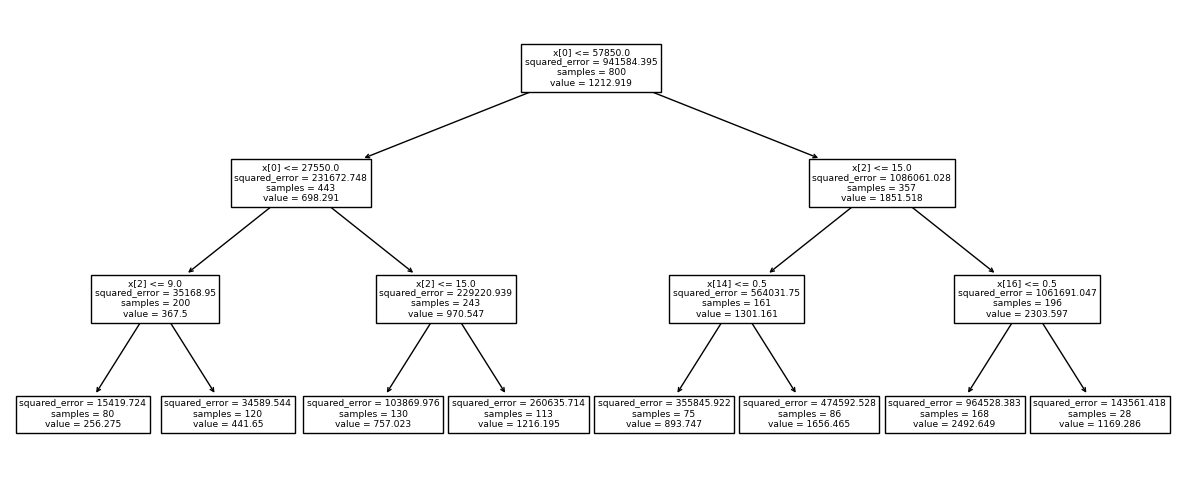

In [33]:
plt.figure(figsize = (15,6))
tree.plot_tree(regtree)
plt.show()